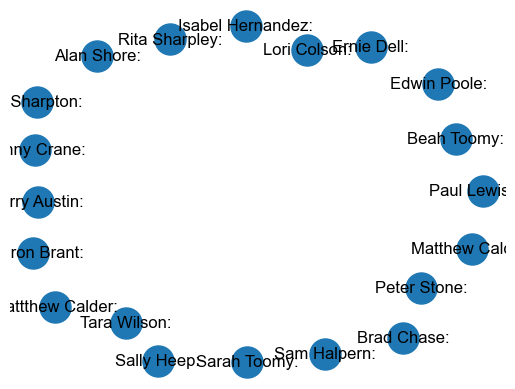

In [1]:
#BOSTON LEGAL

import re
import networkx as nx
import matplotlib.pyplot as plt

# Read the transcript from a text file
with open("pdf_script/txt_script/BL01x01.txt", "r") as f:
    transcript = f.read()

# Find all instances of characters speaking
speakers = list(set(re.findall(r"[A-Z][a-z]* [A-Z][a-z]*:", transcript)))

# Create a graph with each character as a node
G = nx.Graph()
for speaker in speakers:
    G.add_node(speaker)

# Find all instances of characters interacting with each other
interactions = re.findall(r"([A-Z][a-z]* [A-Z][a-z]*):(.+?)(?=[A-Z][a-z]* [A-Z][a-z]*:|$)", transcript, flags=re.DOTALL)

# Add edges to the graph for each interaction between characters
for interaction in interactions:
    speaker1 = interaction[0]
    speech = interaction[1].strip()
    for speaker2 in speakers:
        if speaker2 != speaker1 and speaker2 in speech:
            G.add_edge(speaker1, speaker2)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_labels(G, pos, font_size=12, font_family="Arial")
plt.axis("off")
plt.show()


# Create nodes and edges

In [1]:
import networkx as nx
import re
import os

# Initialize a directed graph
G = nx.DiGraph()

# Directory where the txt files are located
folder = 'white_lotus'

# Loop through all the txt files in the folder
for filename in os.listdir(folder):
    if filename.endswith('.txt'):
        # Open the file and read the lines
        with open(os.path.join(folder, filename), 'r', encoding='utf-8') as f:
            lines = f.readlines()

        # Loop through the lines and extract the speaker information
        for i in range(len(lines)):
            line = lines[i].strip()

            # Check if the line is a dialogue line
            if re.match('^[A-Z]+:', line):
                # Extract the speaker and the dialogue
                speaker, dialogue = re.findall('^([A-Z]+): (.+)$', line)[0]

                # Add the speaker as a node if it doesn't exist already
                if not G.has_node(speaker):
                    G.add_node(speaker)

                # Check the next few lines to see who responds to the speaker
                for j in range(i+1, min(i+4, len(lines))):
                    next_line = lines[j].strip()
                    if re.match('^[A-Z]+:', next_line):
                        next_speaker = re.findall('^([A-Z]+):', next_line)[0]
                        # Add an edge from the speaker to the responder
                        if next_speaker != speaker:
                            G.add_edge(speaker, next_speaker)
                        break

# Print the nodes and edges in the graph
print('Nodes:', G.nodes())
print('Edges:', G.edges())


Nodes: ['ANNOUNCER', 'PAULA', 'OLIVIA', 'ARMOND', 'RACHEL', 'BELINDA', 'NICOLE', 'DILLON', 'LANI', 'SHANE', 'TANYA', 'BOTH', 'DARRELL', 'MARK', 'QUINN', 'CHRISTIE', 'NURSE', 'SPEAKER', 'BARTENDER', 'KITTY', 'LORENZO', 'HUTCH', 'CHARLIE', 'INSTRUCTOR', 'DECKHAND', 'WHITE', 'KAI', 'GREG', 'GUEST', 'WAITRESS', 'MOTHER', 'HOUSEKEEPER', 'CUSTOMER', 'COOLIDGE', 'FACIALIST']
Edges: [('PAULA', 'OLIVIA'), ('PAULA', 'TANYA'), ('PAULA', 'KAI'), ('PAULA', 'SHANE'), ('OLIVIA', 'NICOLE'), ('OLIVIA', 'MARK'), ('OLIVIA', 'SHANE'), ('ARMOND', 'LANI'), ('ARMOND', 'SHANE'), ('ARMOND', 'KITTY'), ('RACHEL', 'SHANE'), ('RACHEL', 'MOTHER'), ('BELINDA', 'NICOLE'), ('BELINDA', 'LANI'), ('BELINDA', 'TANYA'), ('NICOLE', 'ARMOND'), ('NICOLE', 'PAULA'), ('NICOLE', 'MARK'), ('NICOLE', 'QUINN'), ('DILLON', 'TANYA'), ('LANI', 'ARMOND'), ('LANI', 'BELINDA'), ('SHANE', 'ARMOND'), ('SHANE', 'RACHEL'), ('SHANE', 'KITTY'), ('SHANE', 'MARK'), ('TANYA', 'LANI'), ('TANYA', 'DILLON'), ('TANYA', 'BELINDA'), ('TANYA', 'SHANE'),

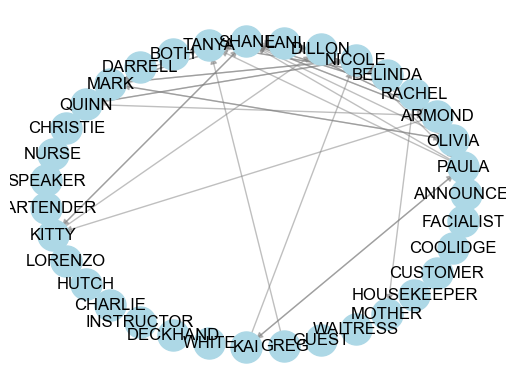

In [2]:
import matplotlib.pyplot as plt

# Set the positions of the nodes using a circular layout
pos = nx.circular_layout(G)

# Draw the nodes and labels
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='Arial')

# Draw the edges
nx.draw_networkx_edges(G, pos, width=1, alpha=0.5, edge_color='grey', arrowsize=10)

# Show the plot
plt.axis('off')
plt.show()


In [15]:
import plotly.graph_objs as go

# Define the nodes and edges as scatter and line traces
node_trace = go.Scatter(x=[], y=[], text=[], mode='markers+text', textposition='top center',
                        hoverinfo='text', marker=dict(color='lightblue', size=30))
edge_trace = go.Scatter(x=[], y=[], line=dict(width=1, color='grey'), mode='lines',
                        hoverinfo='none')

# Loop through the nodes and edges and add them to the traces
for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['text'] += tuple([node])
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

# Define the layout and add the traces to the figure
layout = go.Layout(title='The White Lotus Network', titlefont_size=16, showlegend=False,
                   hovermode='closest', margin=dict(b=20, l=5, r=5, t=40))
fig = go.Figure(data=[edge_trace, node_trace], layout=layout)

# Show the plot
fig.show()


In [3]:
# Read single txt file.

import networkx as nx
import re

# Initialize a directed graph
G = nx.DiGraph()

# Open the script file and read the lines
with open('white_lotus/1.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()

# Loop through the lines and extract the speaker information
for i in range(len(lines)):
    line = lines[i].strip()
    
    # Check if the line is a dialogue line
    if re.match('^[A-Z]+:', line):
        # Extract the speaker and the dialogue
        speaker, dialogue = re.findall('^([A-Z]+): (.+)$', line)[0]
        
        # Add the speaker as a node if it doesn't exist already
        if not G.has_node(speaker):
            G.add_node(speaker)
        
        # Check the next few lines to see who responds to the speaker
        for j in range(i+1, min(i+4, len(lines))):
            next_line = lines[j].strip()
            if re.match('^[A-Z]+:', next_line):
                next_speaker = re.findall('^([A-Z]+):', next_line)[0]
                # Add an edge from the speaker to the responder
                if next_speaker != speaker:
                    G.add_edge(speaker, next_speaker)
                break

# Print the nodes and edges in the graph
print('Nodes:', G.nodes())
print('Edges:', G.edges())


Nodes: ['ANNOUNCER', 'PAULA', 'OLIVIA', 'ARMOND', 'RACHEL', 'BELINDA', 'NICOLE', 'DILLON', 'LANI', 'SHANE', 'TANYA', 'BOTH', 'DARRELL', 'MARK', 'QUINN', 'CHRISTIE', 'NURSE', 'SPEAKER']
Edges: [('PAULA', 'OLIVIA'), ('OLIVIA', 'NICOLE'), ('ARMOND', 'LANI'), ('RACHEL', 'SHANE'), ('BELINDA', 'NICOLE'), ('BELINDA', 'LANI'), ('NICOLE', 'ARMOND'), ('NICOLE', 'PAULA'), ('LANI', 'ARMOND'), ('LANI', 'BELINDA'), ('SHANE', 'ARMOND'), ('TANYA', 'LANI'), ('QUINN', 'ARMOND')]


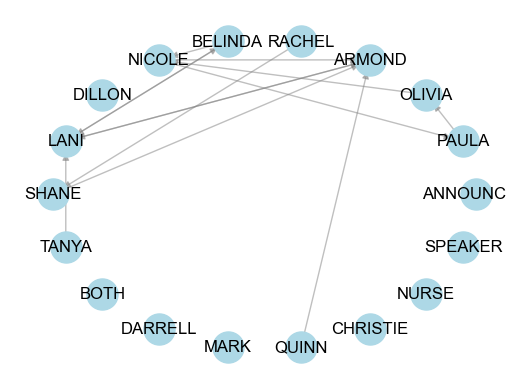

In [4]:
import matplotlib.pyplot as plt

# Set the positions of the nodes using a circular layout
pos = nx.circular_layout(G)

# Draw the nodes and labels
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='Arial')

# Draw the edges
nx.draw_networkx_edges(G, pos, width=1, alpha=0.5, edge_color='grey', arrowsize=10)

# Show the plot
plt.axis('off')
plt.show()


In [8]:
G.edges()

OutEdgeView([('PAULA', 'OLIVIA'), ('PAULA', 'TANYA'), ('PAULA', 'KAI'), ('PAULA', 'SHANE'), ('OLIVIA', 'NICOLE'), ('OLIVIA', 'MARK'), ('OLIVIA', 'SHANE'), ('ARMOND', 'LANI'), ('ARMOND', 'SHANE'), ('ARMOND', 'KITTY'), ('RACHEL', 'SHANE'), ('RACHEL', 'MOTHER'), ('BELINDA', 'NICOLE'), ('BELINDA', 'LANI'), ('BELINDA', 'TANYA'), ('NICOLE', 'ARMOND'), ('NICOLE', 'PAULA'), ('NICOLE', 'MARK'), ('NICOLE', 'QUINN'), ('DILLON', 'TANYA'), ('LANI', 'ARMOND'), ('LANI', 'BELINDA'), ('SHANE', 'ARMOND'), ('SHANE', 'RACHEL'), ('SHANE', 'KITTY'), ('SHANE', 'MARK'), ('TANYA', 'LANI'), ('TANYA', 'DILLON'), ('TANYA', 'BELINDA'), ('TANYA', 'SHANE'), ('MARK', 'NICOLE'), ('MARK', 'QUINN'), ('MARK', 'OLIVIA'), ('MARK', 'SHANE'), ('MARK', 'TANYA'), ('QUINN', 'ARMOND'), ('QUINN', 'NICOLE'), ('KITTY', 'DILLON'), ('KITTY', 'SHANE'), ('KAI', 'PAULA'), ('KAI', 'NICOLE'), ('GREG', 'TANYA')])